# 기상청 API를 통한 데이터셋 확보

In [2]:
from urllib.request import urlopen
import csv

import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [396]:
# data 날짜
# 2022-04-01 00:00:00
# 2023-03-20 00:00:00

In [3]:
# # api 지상관측자료 시간자료
# url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfctm3.php?tm1=202303200000&tm2=202303200600&stn=0&help=1&authKey=-"
# num = "final"
# with urlopen(url) as f:
#     binary_data = f.read()
#     column = ['TM', 'STN', 'WD', 'WS', 'GST_WD', 'GST_WS', 'GST_TM', 'PA', 'PS', 'PT', 'PR',    'TA', 'TD', 'HM', 'PV',
#               'RN', 'RN_DAY', 'RN_JUN', 'RN_INT', 'SD_HR3', 'SD_DAY', 'SD_TOT', 'WC', 'WP',
#               'WW', 'CA_TOT', 'CA_MID', 'CH_MIN', 'CT', 'CT_TOP', 'CT_MID', 'CT_LOW', 'VS', 'SS', 'SI', 'ST_GD',
#               'TS', 'TE_005', 'TE_01', 'TE_02', 'TE_03', 'ST_SEA', 'WH', 'BF', 'IR', 'IX']
#
#     # 주어진 바이트 문자열을 일반 문자열로 변환
#     data_str = binary_data.decode('cp949')
#
#     # 문자열을 행으로 분리
#     lines = data_str.split("\n")
#
#     # 주석 제외 및 데이터만 추출
#     lines = [line for line in lines if not line.startswith("#") and line.strip() != ""]
#
#     # 각 행의 데이터를 공백으로 분리하고 이를 리스트의 리스트로 변환
#     data_list = [line.split() for line in lines]
#
#     # 리스트의 리스트를 데이터프레임으로 변환
#     df_api = pd.DataFrame(data_list, columns=column)
#     df_api.to_csv(f"./meteorological/meteorological_{num}.csv")
# df_api = pd.read_csv(f"./meteorological/meteorological_{num}.csv", encoding='cp949', index_col=0)
# df_api

,TM,STN,WD,WS,GST_WD,GST_WS,GST_TM,PA,PS,PT,...,TS,TE_005,TE_01,TE_02,TE_03,ST_SEA,WH,BF,IR,IX
0,202303200000,90,0,0.4,-9,-9.0,-9,1014.1,1016.3,6,...,4.2,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
1,202303200000,93,0,0.2,-9,-9.0,-9,1007.2,1019.2,2,...,2.2,5.3,7.0,8.6,8.8,-9,-9.0,-9,3,2
2,202303200000,95,5,1.0,-9,-9.0,-9,1000.7,1020.2,2,...,3.3,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
3,202303200000,98,0,0.2,-9,-9.0,-9,1005.0,1019.4,0,...,2.6,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
4,202303200000,99,0,0.3,-9,-9.0,-9,1016.2,1020.1,0,...,1.7,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,202303200600,288,0,0.4,-9,-9.0,-9,1016.5,1017.5,4,...,1.2,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
675,202303200600,289,36,0.5,-9,-9.0,-9,1002.0,1019.4,3,...,-3.3,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
676,202303200600,294,0,0.0,-9,-9.0,-9,1012.2,1017.8,3,...,1.9,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9
677,202303200600,295,25,1.2,-9,-9.0,-9,1011.9,1017.6,3,...,0.6,-99.0,-99.0,-99.0,-99.0,-9,-9.0,-9,3,-9


In [421]:
# 요소별 조회(HT 노장 해발고도 추출)
# url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfctm5.php?tm2=202306060900&obs=TA&stn=0&disp=0&help=1&authKey=-"
# with urlopen(url) as f:
#     binary_data = f.read()
#
#     # 주어진 바이트 문자열을 일반 문자열로 변환
#     data_str = binary_data.decode('cp949')
#
#     # 문자열을 행으로 분리
#     lines = data_str.split("\n")
#
#     # 주석 제외 및 데이터만 추출
#     lines = [line for line in lines if not line.startswith("#") and line.strip() != ""]
#
#     # 각 행의 데이터를 공백으로 분리하고 이를 리스트의 리스트로 변환
#     data_list = [line.split() for line in lines]
#
#     # 리스트의 리스트를 데이터프레임으로 변환
#     df_HT = pd.DataFrame(data_list, columns=['TM', 'STN', 'LON', 'LAT', 'HT', 'VAL'])
#     df_HT.to_csv("./meteorological/meteorological_HT.csv")
# df_HT = pd.read_csv("./meteorological/meteorological_HT.csv", encoding='cp949', index_col=0)
# df_HT

In [7]:
# No-api data import
df_api = pd.read_csv("meteorological/meteorological_final.csv",index_col=0)
df_HT = pd.read_csv("meteorological/meteorological_HT.csv",index_col=0)

In [1]:
# 시계열데이터 import
sma_train = pd.read_csv("meteorological/timeseries_data/sma_train.csv",index_col=0, parse_dates=True)
sma_train.index.freq = '5T'
ses_train = pd.read_csv("meteorological/timeseries_data/ses_train.csv",index_col=0, parse_dates=True)
ses_train.index.freq = '5T'
des_train = pd.read_csv("meteorological/timeseries_data/des_train.csv",index_col=0, parse_dates=True)
des_train.index.freq = '5T'
tes_tr_add = pd.read_csv("meteorological/timeseries_data/tes_tr_add.csv",index_col=0, parse_dates=True)
tes_tr_add.index.freq = '5T'
tes_tr_mul = pd.read_csv("meteorological/timeseries_data/tes_tr_mul.csv",index_col=0, parse_dates=True)
tes_tr_mul.index.freq = '5T'
# 기상데이터 import
df_final = pd.read_csv("meteorological/df_final.csv", index_col=0, parse_dates=True) # 기상데이터 total 최종본
df_final.index.freq = '5T'
train = pd.read_csv("meteorological/train.csv", index_col=0, parse_dates=True) # 2022-04-01 00:00:00 ~ 2023-03-12 23:55:00 까지의 데이터
train.index.freq = '5T'
X_train = pd.read_csv("meteorological/X_train.csv", index_col=0, parse_dates=True)
X_train.index.freq='5T'
y_train = pd.read_csv("meteorological/y_train.csv", index_col=0, parse_dates=True)
y_train.index.freq='5T'
test = pd.read_csv("meteorological/test.csv", index_col=0, parse_dates=True) # 2023-03-13 00:00:00':'2023-03-19 23:55:00' 까지의 데이터
test.index.freq = '5T'
X_test = pd.read_csv("meteorological/X_test.csv", index_col=0, parse_dates=True)
X_test.index.freq = '5T'
y = pd.read_csv("meteorological/y.csv", index_col=0, parse_dates=True)
y.index.freq = '5T'

NameError: name 'pd' is not defined

In [423]:
# df_api.info(memory_usage='deep')
# df_HT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52011 entries, 0 to 52010
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TM      52011 non-null  int64  
 1   STN     52011 non-null  int64  
 2   WD      52011 non-null  int64  
 3   WS      52011 non-null  float64
 4   GST_WD  52011 non-null  int64  
 5   GST_WS  52011 non-null  float64
 6   GST_TM  52011 non-null  int64  
 7   PA      52011 non-null  float64
 8   PS      52011 non-null  float64
 9   PT      52011 non-null  int64  
 10  PR      52011 non-null  float64
 11  TA      52011 non-null  float64
 12  TD      52011 non-null  float64
 13  HM      52011 non-null  float64
 14  PV      52011 non-null  float64
 15  RN      52011 non-null  float64
 16  RN_DAY  52011 non-null  float64
 17  RN_JUN  52011 non-null  float64
 18  RN_INT  52011 non-null  float64
 19  SD_HR3  52011 non-null  float64
 20  SD_DAY  52011 non-null  float64
 21  SD_TOT  52011 non-null  float64
 22

  1. TM     : 관측시각 (KST)
  2. STN    : 국내 지점번호
  3. WD     : 풍향 (16방위)
  4. WS     : 풍속 (m/s)
  5. GST_WD : 돌풍향 (16방위)
  6. GST_WS : 돌풍속 (m/s)
  7. GST_TM : 돌풍속이 관측된 시각 (시분)
  8. PA     : 현지기압 (hPa)
  9. PS     : 해면기압 (hPa)
 10. PT     : 기압변화경향 (Code 0200)
 11. PR     : 기압변화량 (hPa)
 12. TA     : 기온 (C)
 13. TD     : 이슬점온도 (C)
 14. HM     : 상대습도 (%)
 15. PV     : 수증기압 (hPa)
 16. RN     : 강수량 (mm) : 여름철에는 1시간강수량, 겨울철에는 3시간강수량
 17. RN_DAY : 일강수량 (mm) : 해당시간까지 관측된 양(통계표)
 18. RN_JUN : 일강수량 (mm) : 해당시간까지 관측된 양을 전문으로 입력한 값(전문)
 19. RN_INT : 강수강도 (mm/h) : 관측하는 곳이 별로 없음
 20. SD_HR3 : 3시간 신적설 (cm) : 3시간 동안 내린 신적설의 높이
 21. SD_DAY : 일 신적설 (cm) : 00시00분부터 위 관측시간까지 내린 신적설의 높이
 22. SD_TOT : 적설 (cm) : 치우지 않고 그냥 계속 쌓이도록 놔눈 경우의 적설의 높이
 23. WC     : GTS 현재일기 (Code 4677)
 24. WP     : GTS 과거일기 (Code 4561) .. 3(황사),4(안개),5(가랑비),6(비),7(눈),8(소나기),9(뇌전)
 25. WW     : 국내식 일기코드 (문자열 22개) : 2자리씩 11개까지 기록 가능 (코드는 기상자원과 문의)
 26. CA_TOT : 전운량 (1/10)
 27. CA_MID : 중하층운량 (1/10)
 28. CH_MIN : 최저운고 (100m)
 29. CT     : 운형 (문자열 8개) : 2자리 코드로 4개까지 기록 가능
 30. CT_TOP : GTS 상층운형 (Code 0509)
 31. CT_MID : GTS 중층운형 (Code 0515)
 32. CT_LOW : GTS 하층운형 (Code 0513)
 33. VS     : 시정 (10m)
 34. SS     : 일조 (hr)
 35. SI     : 일사 (MJ/m2)
 36. ST_GD  : 지면상태 코드 (코드는 기상자원과 문의)
 37. TS     : 지면온도 (C)
 38. TE_005 : 5cm 지중온도 (C)
 39. TE_01  : 10cm 지중온도 (C)
 40. TE_02  : 20cm 지중온도 (C)
 41. TE_03  : 30cm 지중온도 (C)
 42. ST_SEA : 해면상태 코드 (코드는 기상자원과 문의)
 43. WH     : 파고 (m) : 해안관측소에서 목측한 값
 44. BF     : Beaufart 최대풍력(GTS코드)
 45. IR     : 강수자료 유무 (Code 1819) .. 1(Sec1에 포함), 2(Sec3에 포함), 3(무강수), 4(결측)
 46. IX     : 유인관측/무인관측 및 일기 포함여부 (code 1860) .. 1,2,3(유인) 4,5,6(무인) / 1,4(포함), 2,5(생략), 3,6(결측)

47. df_HT - HT : 노장(온도측정기)의 높이

## Data Preprocessing

<AxesSubplot:>

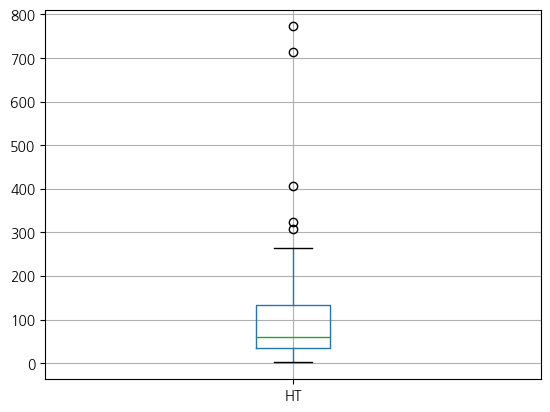

In [5]:
# df_api
 # =df_api[["TM","TD","TA","HM","RN","SS","TS","WS","PA"]]
# df_api.nunique().sort_values(ascending=False)
#HT(노상 높이에 따른 STN 이상치 제거)
df_HT[["HT"]].boxplot()

In [8]:
def del_irr(df_ht, df_api):

    Q1, Q3 = df_ht["HT"].quantile([0.25,0.75])
    IQR = Q3-Q1
    cond1 = Q1 - 1.5*IQR
    cond2 = Q3 +1.5*IQR
    df_HT_norm = df_ht.loc[(df_ht["HT"]>cond1)&(df_ht["HT"]<cond2),:].copy()
    # df_HT_norm["HT"].describe()
    # target_HT = df_HT_norm["STN"]
    df_api_norm = df_api.loc[df_api['STN'].isin(df_HT_norm['STN'])]
    df_api_norm['TM'] = pd.to_datetime(df_api_norm['TM'],format= '%Y%m%d%H%M')
    df_api_norm = df_api_norm.set_index('TM')
    # 시간에 따른 각 열의 평균치로 치환
    df_api_norm = df_api_norm.groupby(df_api_norm.index).mean()
    df_meteo = df_api_norm[['TD', 'TA', 'HM', 'RN', 'SS', 'TS', 'WS', 'PA', 'VS']].copy()
    column_list = ['이슬점온도','기온','상대습도','강수량','일조량','지면온도','풍속','기압','시정(가시거리)']
    df_meteo.columns = column_list
    return df_meteo

In [430]:
# 기상정보 데이터 확인
# df_api_norm.nunique().sort_values(ascending=False)

In [9]:
df = del_irr(df_HT, df_api)

C:\Users\ppjjh\AppData\Local\Temp\ipykernel_24844\2529927757.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_api_norm['TM'] = pd.to_datetime(df_api_norm['TM'],format= '%Y%m%d%H%M')


In [10]:

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-03-20 00:00:00 to 2023-03-20 06:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   이슬점온도     7 non-null      float64
 1   기온        7 non-null      float64
 2   상대습도      7 non-null      float64
 3   강수량       7 non-null      float64
 4   일조량       7 non-null      float64
 5   지면온도      7 non-null      float64
 6   풍속        7 non-null      float64
 7   기압        7 non-null      float64
 8   시정(가시거리)  7 non-null      float64
dtypes: float64(9)
memory usage: 560.0 bytes


In [11]:
df.describe()

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
count,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000
mean,-1.267236,3.129503,74.776398,-8.986025,-9.0,2.372826,0.720031,1008.295497,1172.131988
std,0.360930,1.085102,3.621555,0.036975,0.0,0.834590,0.077586,0.480794,89.029103
min,-1.713043,1.789130,69.543478,-9.000000,-9.0,1.327174,0.641304,1007.820652,1049.717391
25%,-1.522283,2.329348,72.195652,-9.000000,-9.0,1.783152,0.673913,1007.889130,1102.489130
50%,-1.295652,2.996739,75.195652,-9.000000,-9.0,2.260870,0.688043,1008.115217,1190.282609
75%,-1.063043,3.842935,77.478261,-9.000000,-9.0,2.879348,0.747826,1008.701630,1232.706522
max,-0.691304,4.776087,79.347826,-8.902174,-9.0,3.696739,0.867391,1008.951087,1294.532609


In [12]:
df.shape

(7, 9)

In [14]:
df.to_csv(f"meteorological/preprocessing_data/sample_{num}.csv")

## Concatenate

In [2]:
import os
from urllib.request import urlopen
import csv

import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
def concatenate_csv_files(folder_path):
    dfs = []  # 데이터프레임을 저장할 리스트

    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        if os.path.isfile(filepath) and filename.endswith('.csv'):
            df = pd.read_csv(filepath, index_col=0, parse_dates=True)
            dfs.append(df)

    concatenated_df = pd.concat(dfs)
    return concatenated_df

# 특정 폴더 경로를 지정합니다.
folder_path = 'meteorological/preprocessing_data'

# CSV 파일들을 연결(concatenate)합니다.
concatenated_df = concatenate_csv_files(folder_path)

In [3]:
# 결과 출력
concatenated_df =concatenated_df.sort_index()
concatenated_df

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
TM,,,,,,,,,
2022-04-01 00:00:00,3.350549,6.443956,81.538462,-6.900000,-9.0,6.416484,1.884615,1017.737363,2284.109890
2022-04-01 01:00:00,3.094505,5.956044,82.792308,-8.095604,-9.0,5.921978,1.800000,1018.062637,2316.065934
2022-04-01 02:00:00,2.906593,5.525275,84.186813,-8.345055,-9.0,5.523077,1.579121,1018.102198,2197.758242
2022-04-01 03:00:00,2.583516,5.115385,84.681319,-8.796703,-9.0,4.998901,1.565934,1018.008791,2258.417582
2022-04-01 04:00:00,2.270330,4.724176,85.186813,-9.000000,-9.0,4.505495,1.612088,1018.113187,2127.945055
...,...,...,...,...,...,...,...,...,...
2023-03-19 20:00:00,-0.556522,9.303261,53.021739,-9.000000,-9.0,7.509783,1.183696,1008.784783,1607.608696
2023-03-19 21:00:00,-0.342391,7.868478,58.576087,-9.000000,-9.0,6.211957,1.059783,1009.006522,1530.586957
2023-03-19 22:00:00,-0.505435,6.720652,62.141304,-9.000000,-9.0,5.135870,0.911957,1009.130435,1456.119565


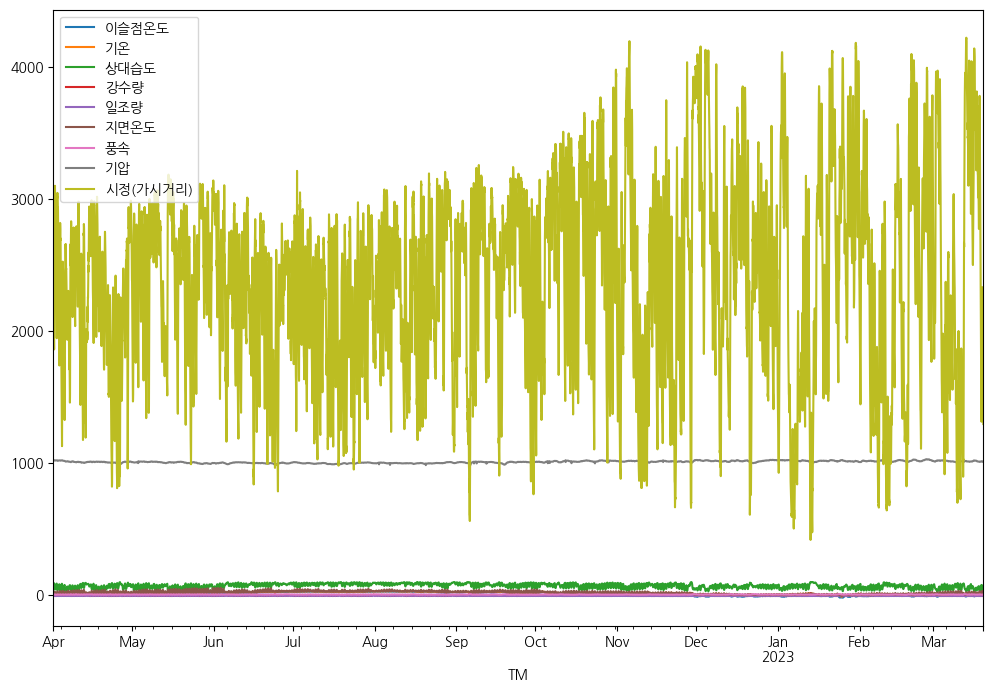

In [4]:
concatenated_df.plot(figsize=(12,8));

## Interpolate

### Linear Interpolate

In [15]:

def lin_inter(df):
    # 5분 간격으로 리샘플링
    df_resampled = df.resample('5T').mean()
    # NaN 값들을 선형적으로 보간
    df_resampled = df_resampled.interpolate(method='linear')
    return df_resampled

In [17]:
df = lin_inter(df)

In [18]:
df.shape

(73, 9)

In [19]:

def find_duplicate_index(df):
    duplicate_index = df.index[df.index.duplicated()]
    return duplicate_index

# 중복된 인덱스 값을 찾습니다.
duplicate_index = find_duplicate_index(df)

# 결과 출력
print("Duplicate Indices:", duplicate_index)


Duplicate Indices: DatetimeIndex([], dtype='datetime64[ns]', name='TM', freq='5T')


In [324]:
# 선형 보간법을 위한 마지막 비타겟 데이터 제거
df = df.iloc[:-1]

In [325]:
df.to_csv("meteorological/df.csv")

In [339]:
df = pd.read_csv("meteorological/df.csv", index_col=0, parse_dates=True) # 기상 변수

In [20]:
df

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
TM,,,,,,,,,
2023-03-20 00:00:00,-0.691304,4.776087,69.543478,-9.000000,-9.0,3.696739,0.867391,1008.951087,1294.532609
2023-03-20 00:05:00,-0.713406,4.720562,69.701993,-9.000000,-9.0,3.643841,0.859330,1008.941576,1290.255435
2023-03-20 00:10:00,-0.735507,4.665036,69.860507,-9.000000,-9.0,3.590942,0.851268,1008.932065,1285.978261
2023-03-20 00:15:00,-0.757609,4.609511,70.019022,-9.000000,-9.0,3.538043,0.843207,1008.922554,1281.701087
2023-03-20 00:20:00,-0.779710,4.553986,70.177536,-9.000000,-9.0,3.485145,0.835145,1008.913043,1277.423913
...,...,...,...,...,...,...,...,...,...
2023-03-20 05:40:00,-1.677536,1.895290,78.981884,-8.934783,-9.0,1.428986,0.669928,1007.889493,1067.554348
2023-03-20 05:45:00,-1.686413,1.868750,79.073370,-8.926630,-9.0,1.403533,0.667663,1007.898098,1063.095109
2023-03-20 05:50:00,-1.695290,1.842210,79.164855,-8.918478,-9.0,1.378080,0.665399,1007.906703,1058.635870


### Y value concatenate

In [341]:
y_train = pd.read_csv("y_train.csv", index_col=0, parse_dates=True)
y_test = pd.read_csv("y.csv",index_col=0, parse_dates=True)

In [342]:
y_train

,현재수요(MW)
기준일시,
2022-04-01 00:00:00,62453.29
2022-04-01 00:05:00,62329.25
2022-04-01 00:10:00,61830.96
2022-04-01 00:15:00,61648.72
2022-04-01 00:20:00,61382.62
...,...
2023-03-12 23:35:00,60235.18
2023-03-12 23:40:00,60106.61
2023-03-12 23:45:00,59725.49


In [343]:
y_train.shape

(99545, 1)

In [344]:
y_test.shape

(2016, 1)

In [345]:
# y value인 5분단위 현재수요의 결측치 선형으로 보간함
y_train = lin_inter(y_train)
y_train.shape

(99648, 1)

In [346]:
# y value인 5분단위 현재수요의 결측치 선형으로 보간함
y_test = lin_inter(y_test)
y_test.shape

(2016, 1)

In [347]:
y_test.shape

(2016, 1)

In [348]:
Y = pd.concat([y_train,y_test], axis=0)
Y

,현재수요(MW)
기준일시,
2022-04-01 00:00:00,62453.29
2022-04-01 00:05:00,62329.25
2022-04-01 00:10:00,61830.96
2022-04-01 00:15:00,61648.72
2022-04-01 00:20:00,61382.62
...,...
2023-03-19 23:35:00,58627.16
2023-03-19 23:40:00,57941.24
2023-03-19 23:45:00,57726.21


In [349]:
df_final = pd.concat([df,Y], axis=1)
df_final

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),현재수요(MW)
2022-04-01 00:00:00,3.350549,6.443956,81.538462,-6.900000,-9.0,6.416484,1.884615,1017.737363,2284.109890,62453.29
2022-04-01 00:05:00,3.329212,6.403297,81.642949,-6.999634,-9.0,6.375275,1.877564,1017.764469,2286.772894,62329.25
2022-04-01 00:10:00,3.307875,6.362637,81.747436,-7.099267,-9.0,6.334066,1.870513,1017.791575,2289.435897,61830.96
2022-04-01 00:15:00,3.286538,6.321978,81.851923,-7.198901,-9.0,6.292857,1.863462,1017.818681,2292.098901,61648.72
2022-04-01 00:20:00,3.265201,6.281319,81.956410,-7.298535,-9.0,6.251648,1.856410,1017.845788,2294.761905,61382.62
...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,-0.622464,5.160145,68.157609,-9.000000,-9.0,3.965761,0.871467,1009.028533,1319.183877,58627.16
2023-03-19 23:40:00,-0.636232,5.083333,68.434783,-9.000000,-9.0,3.911957,0.870652,1009.013043,1314.253623,57941.24
2023-03-19 23:45:00,-0.650000,5.006522,68.711957,-9.000000,-9.0,3.858152,0.869837,1008.997554,1309.323370,57726.21
2023-03-19 23:50:00,-0.663768,4.929710,68.989130,-9.000000,-9.0,3.804348,0.869022,1008.982065,1304.393116,57755.40


In [350]:
df_final.to_csv("meteorological/df_final.csv")

# Target data 추출

## train 데이터 추출

In [359]:
# train기간
train = df_final.loc[:'2023-03-12 23:55:00']

In [360]:
train.to_csv("meteorological/train.csv")

In [361]:
train

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),현재수요(MW)
2022-04-01 00:00:00,3.350549,6.443956,81.538462,-6.900000,-9.0,6.416484,1.884615,1017.737363,2284.109890,62453.29
2022-04-01 00:05:00,3.329212,6.403297,81.642949,-6.999634,-9.0,6.375275,1.877564,1017.764469,2286.772894,62329.25
2022-04-01 00:10:00,3.307875,6.362637,81.747436,-7.099267,-9.0,6.334066,1.870513,1017.791575,2289.435897,61830.96
2022-04-01 00:15:00,3.286538,6.321978,81.851923,-7.198901,-9.0,6.292857,1.863462,1017.818681,2292.098901,61648.72
2022-04-01 00:20:00,3.265201,6.281319,81.956410,-7.298535,-9.0,6.251648,1.856410,1017.845788,2294.761905,61382.62
...,...,...,...,...,...,...,...,...,...,...
2023-03-12 23:35:00,-8.620109,1.985236,45.796196,-8.577083,-9.0,1.198822,5.067663,1013.323188,3841.677536,60235.18
2023-03-12 23:40:00,-8.701087,1.941667,45.652174,-8.516667,-9.0,1.157971,5.054348,1013.334420,3849.757246,60106.61
2023-03-12 23:45:00,-8.782065,1.898098,45.508152,-8.456250,-9.0,1.117120,5.041033,1013.345652,3857.836957,59725.49
2023-03-12 23:50:00,-8.863043,1.854529,45.364130,-8.395833,-9.0,1.076268,5.027717,1013.356884,3865.916667,59485.58


In [362]:
X_train = train.drop("현재수요(MW)", axis=1)
X_train.to_csv("meteorological/X_train.csv")
y_train = train['현재수요(MW)']
y_train.to_csv("meteorological/y_train.csv")


In [363]:
X_train.shape, y_train.shape

((99648, 9), (99648,))

In [364]:
y_train.isna().sum()

0

In [365]:
y_train

2022-04-01 00:00:00    62453.29
2022-04-01 00:05:00    62329.25
2022-04-01 00:10:00    61830.96
2022-04-01 00:15:00    61648.72
2022-04-01 00:20:00    61382.62
                         ...   
2023-03-12 23:35:00    60235.18
2023-03-12 23:40:00    60106.61
2023-03-12 23:45:00    59725.49
2023-03-12 23:50:00    59485.58
2023-03-12 23:55:00    58929.88
Name: 현재수요(MW), Length: 99648, dtype: float64

## test 데이터 추출

In [366]:
# test기간
test = df_final.loc['2023-03-13 00:00:00':'2023-03-19 23:55:00']
test.to_csv("meteorological/test.csv")

In [367]:
test

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리),현재수요(MW)
2023-03-13 00:00:00,-9.025000,1.767391,45.076087,-8.275000,-9.0,0.994565,5.001087,1013.379348,3882.076087,58782.03
2023-03-13 00:05:00,-9.108243,1.728261,44.910326,-8.335417,-9.0,0.951993,4.978804,1013.400543,3885.260870,58954.44
2023-03-13 00:10:00,-9.191486,1.689130,44.744565,-8.395833,-9.0,0.909420,4.956522,1013.421739,3888.445652,58710.58
2023-03-13 00:15:00,-9.274728,1.650000,44.578804,-8.456250,-9.0,0.866848,4.934239,1013.442935,3891.630435,58298.44
2023-03-13 00:20:00,-9.357971,1.610870,44.413043,-8.516667,-9.0,0.824275,4.911957,1013.464130,3894.815217,58263.70
...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,-0.622464,5.160145,68.157609,-9.000000,-9.0,3.965761,0.871467,1009.028533,1319.183877,58627.16
2023-03-19 23:40:00,-0.636232,5.083333,68.434783,-9.000000,-9.0,3.911957,0.870652,1009.013043,1314.253623,57941.24
2023-03-19 23:45:00,-0.650000,5.006522,68.711957,-9.000000,-9.0,3.858152,0.869837,1008.997554,1309.323370,57726.21
2023-03-19 23:50:00,-0.663768,4.929710,68.989130,-9.000000,-9.0,3.804348,0.869022,1008.982065,1304.393116,57755.40


In [368]:
X_test = test.drop("현재수요(MW)", axis=1)
X_test.to_csv("meteorological/X_test.csv")

In [369]:
y = test['현재수요(MW)']
y.to_csv("meteorological/y.csv")


In [370]:
X_test.shape, y.shape

((2016, 9), (2016,))

## train, test 분포 비교

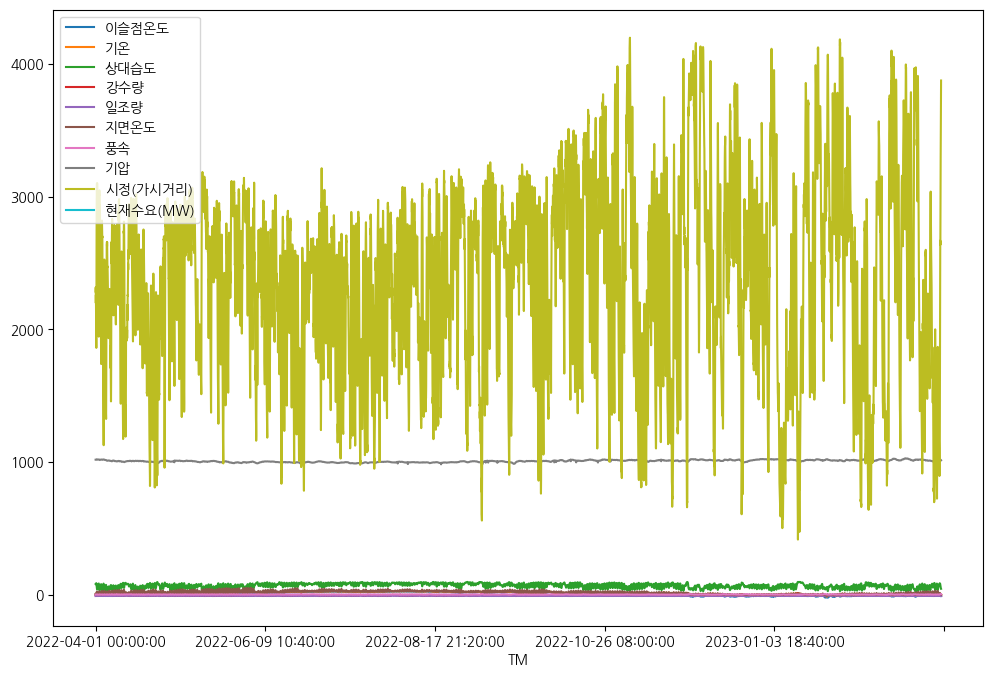

In [265]:
train.plot(figsize = (12,8));

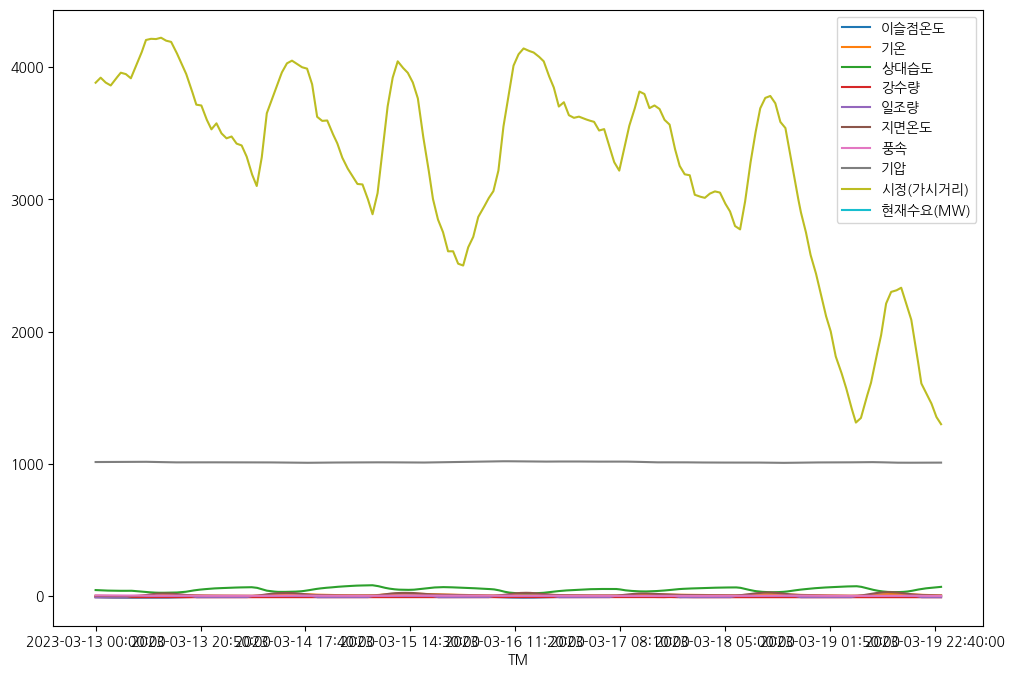

In [266]:
test.plot(figsize = (12,8));

# Check Feature Importances

## Banyla RandomForest

In [541]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

In [46]:
X_train = pd.read_csv("meteorological/X_train.csv")
y_train = pd.read_csv("meteorological/y_train.csv")

In [542]:
def get_score_splited_train(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest,ytest)
    pred = model.predict(xtest)
    C = mape(ytest, pred)

    print(f"ACC train : {A:.4f}, test : {B:.4f}, mape : {C:.4f}" )

In [543]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train)

In [558]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=0)

In [559]:
get_score_splited_train(rf_model, xtrain, xtest, ytrain, ytest)

ACC train : 0.9984, test : 0.9894, mape : 0.0079


In [560]:
banyla_rf = rf_model.predict(X_test)

In [561]:
mape(y, banyla_rf)

0.10745118576383535

## EDA

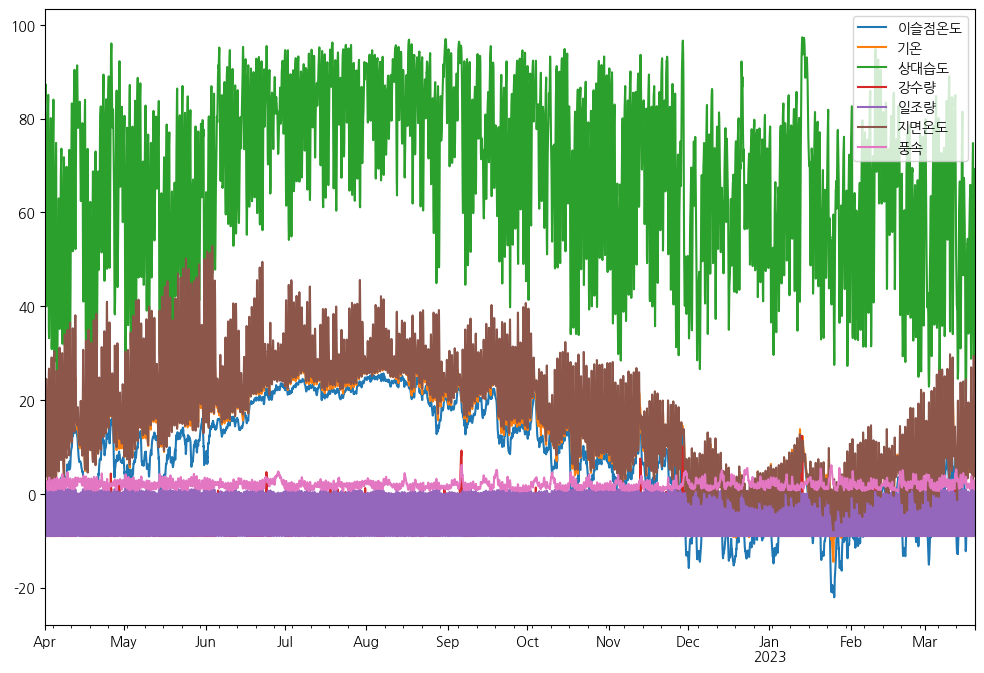

In [565]:
df_final.drop(["시정(가시거리)","기압","현재수요(MW)"], axis=1).plot(figsize = (12,8));

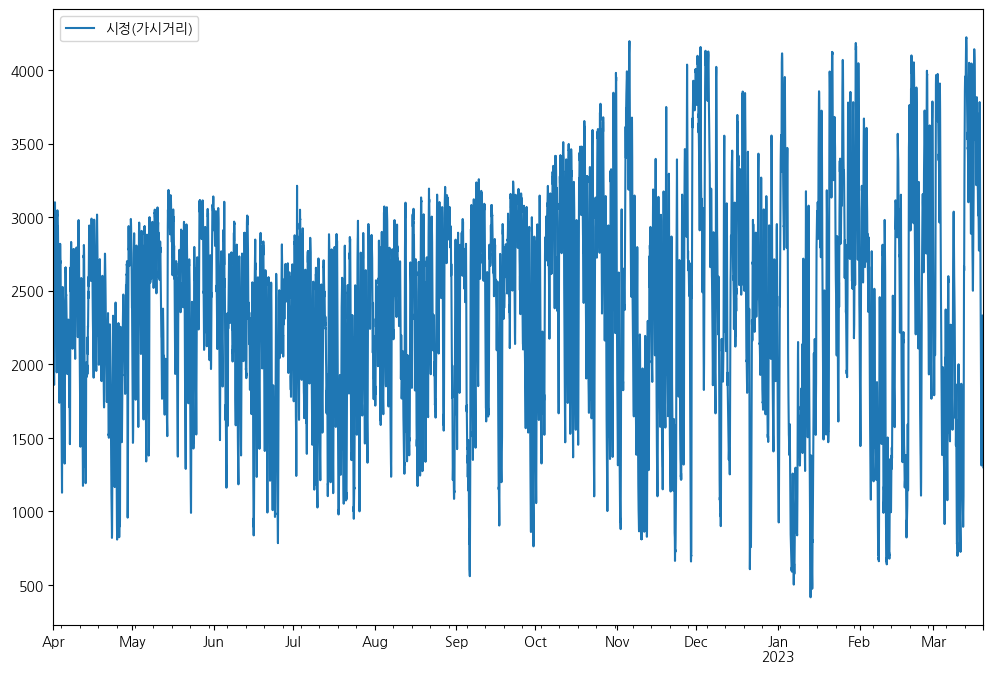

In [566]:
df_final[["시정(가시거리)"]].plot(figsize = (12,8));

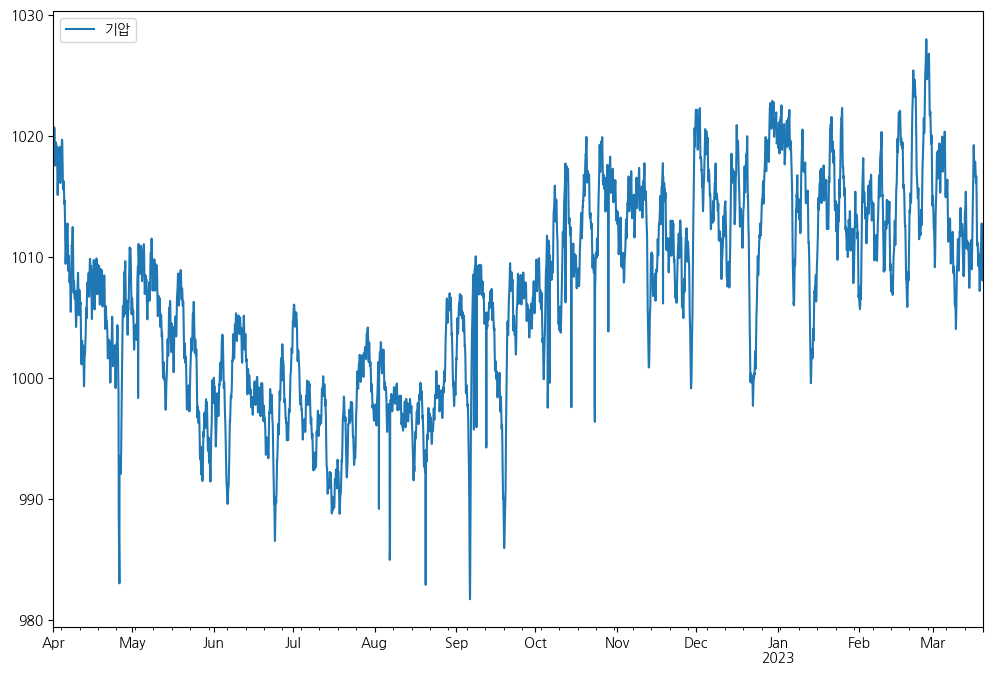

In [567]:
df_final[["기압"]].plot(figsize = (12,8));

In [562]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = xtrain.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


          importance
이슬점온도       0.254318
기온          0.196615
기압          0.114036
일조량         0.104632
지면온도        0.099287
시정(가시거리)    0.078717
풍속          0.067381
상대습도        0.050252
강수량         0.034763


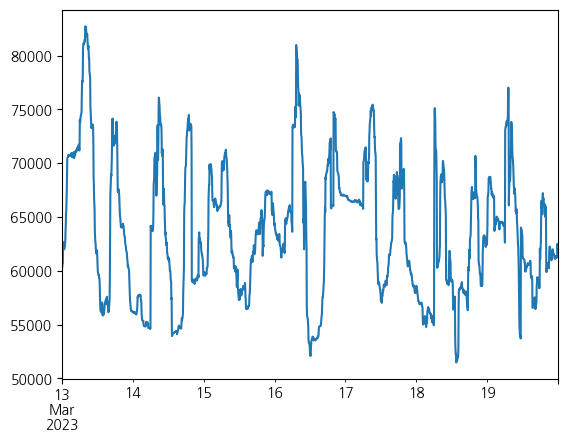

In [568]:
pd.Series(banyla_rf, index = y.index).plot();

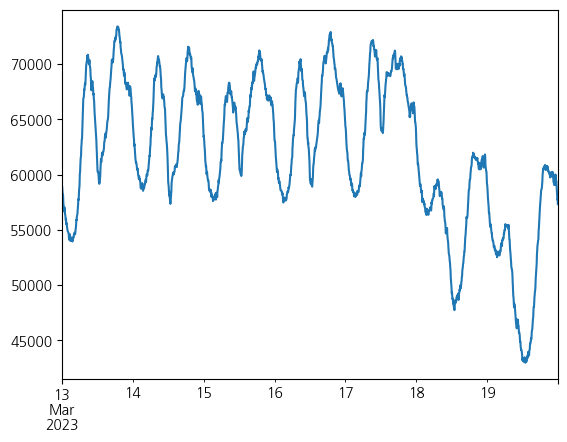

In [564]:
y.plot();

# RandomForest - 향후 6시간

In [ ]:
# # api 지상관측자료 시간자료
url = "https://apihub.kma.go.kr/api/typ01/url/kma_sfctm3.php?tm1=202303200000&tm2=202303200600&stn=0&help=1&authKey=-"
num = "final"
with urlopen(url) as f:
    binary_data = f.read()
    column = ['TM', 'STN', 'WD', 'WS', 'GST_WD', 'GST_WS', 'GST_TM', 'PA', 'PS', 'PT', 'PR', 'TA', 'TD', 'HM', 'PV',
              'RN', 'RN_DAY', 'RN_JUN', 'RN_INT', 'SD_HR3', 'SD_DAY', 'SD_TOT', 'WC', 'WP',
              'WW', 'CA_TOT', 'CA_MID', 'CH_MIN', 'CT', 'CT_TOP', 'CT_MID', 'CT_LOW', 'VS', 'SS', 'SI', 'ST_GD',
              'TS', 'TE_005', 'TE_01', 'TE_02', 'TE_03', 'ST_SEA', 'WH', 'BF', 'IR', 'IX']

    # 주어진 바이트 문자열을 일반 문자열로 변환
    data_str = binary_data.decode('cp949')

    # 문자열을 행으로 분리
    lines = data_str.split("\n")

    # 주석 제외 및 데이터만 추출
    lines = [line for line in lines if not line.startswith("#") and line.strip() != ""]

    # 각 행의 데이터를 공백으로 분리하고 이를 리스트의 리스트로 변환
    data_list = [line.split() for line in lines]

    # 리스트의 리스트를 데이터프레임으로 변환
    df_api = pd.DataFrame(data_list, columns=column)
    df_api.to_csv(f"./meteorological/meteorological_{num}.csv")
df_api = pd.read_csv(f"./meteorological/meteorological_{num}.csv", encoding='cp949', index_col=0)
df_api
# No-api data import
df_api = pd.read_csv("meteorological/meteorological_final.csv", index_col=0)
df_HT = pd.read_csv("meteorological/meteorological_HT.csv", index_col=0)
# df_api
# =df_api[["TM","TD","TA","HM","RN","SS","TS","WS","PA"]]
# df_api.nunique().sort_values(ascending=False)
#HT(노상 높이에 따른 STN 이상치 제거)
df_HT[["HT"]].boxplot()


def del_irr(df_ht, df_api):
    Q1, Q3 = df_ht["HT"].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    cond1 = Q1 - 1.5 * IQR
    cond2 = Q3 + 1.5 * IQR
    df_HT_norm = df_ht.loc[(df_ht["HT"] > cond1) & (df_ht["HT"] < cond2), :].copy()
    # df_HT_norm["HT"].describe()
    # target_HT = df_HT_norm["STN"]
    df_api_norm = df_api.loc[df_api['STN'].isin(df_HT_norm['STN'])]
    df_api_norm['TM'] = pd.to_datetime(df_api_norm['TM'], format='%Y%m%d%H%M')
    df_api_norm = df_api_norm.set_index('TM')
    # 시간에 따른 각 열의 평균치로 치환
    df_api_norm = df_api_norm.groupby(df_api_norm.index).mean()
    df_meteo = df_api_norm[['TD', 'TA', 'HM', 'RN', 'SS', 'TS', 'WS', 'PA', 'VS']].copy()
    column_list = ['이슬점온도', '기온', '상대습도', '강수량', '일조량', '지면온도', '풍속', '기압', '시정(가시거리)']
    df_meteo.columns = column_list
    return df_meteo


df = del_irr(df_HT, df_api)
df.shape
df.to_csv(f"meteorological/preprocessing_data/sample_{num}.csv")


def lin_inter(df):
    # 5분 간격으로 리샘플링
    df_resampled = df.resample('5T').mean()
    # NaN 값들을 선형적으로 보간
    df_resampled = df_resampled.interpolate(method='linear')
    return df_resampled


df = lin_inter(df)
df.shape


def find_duplicate_index(df):
    duplicate_index = df.index[df.index.duplicated()]
    return duplicate_index


# 중복된 인덱스 값을 찾습니다.
duplicate_index = find_duplicate_index(df)

# 결과 출력
print("Duplicate Indices:", duplicate_index)


In [23]:
df

,이슬점온도,기온,상대습도,강수량,일조량,지면온도,풍속,기압,시정(가시거리)
TM,,,,,,,,,
2023-03-20 00:00:00,-0.691304,4.776087,69.543478,-9.000000,-9.0,3.696739,0.867391,1008.951087,1294.532609
2023-03-20 00:05:00,-0.713406,4.720562,69.701993,-9.000000,-9.0,3.643841,0.859330,1008.941576,1290.255435
2023-03-20 00:10:00,-0.735507,4.665036,69.860507,-9.000000,-9.0,3.590942,0.851268,1008.932065,1285.978261
2023-03-20 00:15:00,-0.757609,4.609511,70.019022,-9.000000,-9.0,3.538043,0.843207,1008.922554,1281.701087
2023-03-20 00:20:00,-0.779710,4.553986,70.177536,-9.000000,-9.0,3.485145,0.835145,1008.913043,1277.423913
...,...,...,...,...,...,...,...,...,...
2023-03-20 05:40:00,-1.677536,1.895290,78.981884,-8.934783,-9.0,1.428986,0.669928,1007.889493,1067.554348
2023-03-20 05:45:00,-1.686413,1.868750,79.073370,-8.926630,-9.0,1.403533,0.667663,1007.898098,1063.095109
2023-03-20 05:50:00,-1.695290,1.842210,79.164855,-8.918478,-9.0,1.378080,0.665399,1007.906703,1058.635870
